In [1]:
# Dataset: SMSSpamCollection
# Location: https://mitu.co.in/dataset

### Import the necessary libraries

In [14]:
import pandas as pd
import seaborn as sns

### Import the dataset

In [3]:
cols = ['label','text']

In [4]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=cols)

In [5]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Separate the input and output data

In [6]:
# input data
x = df['text']
# output data
y = df['label']

In [7]:
df.shape

(5572, 2)

<AxesSubplot:xlabel='label', ylabel='count'>

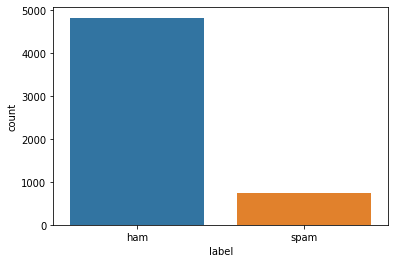

In [8]:
sns.countplot(x=df['label'])

In [9]:
y.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Preprocessing Steps

In [10]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#### Tokenization

In [11]:
sent = 'Hello friends! How are you? Enjoy learning Python.'

In [12]:
tokens1 = word_tokenize(sent)

#### Remove punctuation symbols

In [13]:
tokens2 = [x for x in tokens1 if x.isalpha() or x.isdigit()]
tokens2

['Hello', 'friends', 'How', 'are', 'you', 'Enjoy', 'learning', 'Python']

#### Stopwords removal

In [17]:
swords = stopwords.words('english')

In [20]:
tokens3 = [x.lower() for x in tokens2 if x.lower() not in swords]

In [21]:
tokens3

['hello', 'friends', 'enjoy', 'learning', 'python']

#### Remove the word stems

In [23]:
ps = PorterStemmer()

In [24]:
tokens4 = [ps.stem(x) for x in tokens3]

In [25]:
tokens4

['hello', 'friend', 'enjoy', 'learn', 'python']

### Create a function for cleaning the text

In [28]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [x for x in tokens1 if x.isalpha() or x.isdigit()]
    tokens3 = [x.lower() for x in tokens2 if x.lower() not in swords]
    tokens4 = [ps.stem(x) for x in tokens3]
    return tokens4

In [29]:
sent

'Hello friends! How are you? Enjoy learning Python.'

In [30]:
clean_text(sent)

['hello', 'friend', 'enjoy', 'learn', 'python']

In [31]:
sent1 = 'Wikipedia was launched by Jimmy Wales and Larry Sanger on January 15, 2001. Sanger coined its name as a blend of wiki and encyclopedia.'

In [32]:
clean_text(sent1)

['wikipedia',
 'launch',
 'jimmi',
 'wale',
 'larri',
 'sanger',
 'januari',
 '15',
 '2001',
 'sanger',
 'coin',
 'name',
 'blend',
 'wiki',
 'encyclopedia']

In [34]:
x.apply(lambda a: clean_text(a))

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [time, tri, 2, contact, u, pound, prize, 2, cl...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

#### Term Frequency

In [36]:
clean_text(sent)

['hello', 'friend', 'enjoy', 'learn', 'python']

In [37]:
1/5

0.2

In [38]:
clean_text(sent1)

['wikipedia',
 'launch',
 'jimmi',
 'wale',
 'larri',
 'sanger',
 'januari',
 '15',
 '2001',
 'sanger',
 'coin',
 'name',
 'blend',
 'wiki',
 'encyclopedia']

In [39]:
2/15

0.13333333333333333

#### Inverse Document Frequency

In [41]:
import numpy as np

In [42]:
np.log(1000/133)

2.017406150760383

### TF*IDF Vectorizer

In [44]:
x.shape

(5572,)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [47]:
x_new = tfidf.fit_transform(x)

In [48]:
x_new.shape

(5572, 6429)

In [50]:
pd.DataFrame(x_new)

,0
0,"(0, 6121)\t0.1865677565026138\n (0, 686)\t0..."
1,"(0, 4084)\t0.5514643620986254\n (0, 5889)\t..."
2,"(0, 754)\t0.17606189161034486\n (0, 1247)\t..."
3,"(0, 663)\t0.2877362015312696\n (0, 2868)\t0..."
4,"(0, 5679)\t0.38520136747877337\n (0, 791)\t..."
...,...
5567,"(0, 128)\t0.4399593136391355\n (0, 2010)\t0..."
5568,"(0, 2134)\t0.5692865309624537\n (0, 2413)\t..."
5569,"(0, 4322)\t0.6374814122151056\n (0, 3773)\t..."
5570,"(0, 1059)\t0.3546749465287117\n (0, 555)\t0..."


### Cross-Validation

In [52]:
x_new.shape

(5572, 6429)

In [54]:
y.shape

(5572,)

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(
    x_new, y, random_state=0, test_size=0.25)

In [58]:
x_train.shape

(4179, 6429)

In [59]:
x_test.shape

(1393, 6429)

### Build the Machine Learning model

In [61]:
# Import the machine learning class
from sklearn.ensemble import RandomForestClassifier

In [62]:
# Create the object
model = RandomForestClassifier(random_state=0)

In [63]:
# Train the algorithm
model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

#### Predictions on test dataset

In [65]:
y_pred = model.predict(x_test)

In [66]:
y_pred

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [68]:
len(y_pred)

1393

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) * 100

97.63101220387652

### Prediction on unseen data

In [72]:
# Location: https://mitu.co.in/dataset
# Dataset: sample.csv

In [73]:
df = pd.read_csv('sample.csv', sep='\t', names=['text'])

In [74]:
df

,text
0,Ok lar i double check wif da hair dresser alre...
1,"As a valued customer, I am pleased to advise y..."
2,"Today is ""song dedicated day.."" Which song wil..."


In [77]:
new = tfidf.transform(df['text'])

In [79]:
model.predict(new)

array(['ham', 'spam', 'ham'], dtype=object)